## basic data visualizations


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [33]:
sns.set()

In [34]:
# https://github.com/allisonhorst/palmerpenguins
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [35]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.groupby(["species", "island", "sex"]).sum()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island    sex                                                        
Adelie    Biscoe    Female           821.9          389.5             4118.0   
                    Male             893.0          418.8             4189.0   
          Dream     Female           996.6          475.7             5072.0   
                    Male            1122.0          527.5             5374.0   
          Torgersen Female           901.3          421.2             4519.0   
                    Male             933.5          446.0             4483.0   
Chinstrap Dream     Female          1583.5          598.0             6519.0   
                    Male            1737.2          654.6             6797.0   
Gentoo    Biscoe    Female          2642.7          825.8            12337.0   
                    Male            3017.9          958.8            13514.0   

                            body_mass_g  
species   island    sex                  
Adelie    Biscoe    Female      74125.0  
                    Male        89100.0  
          Dream     Female      90300.0  
                    Male       113275.0  
          Torgersen Female      81500.0  
                    Male        92800.0  
Chinstrap Dream     Female     119925.0  
                    Male       133925.0  
Gentoo    Biscoe    Female     271425.0  
                    Male       334575.0

### pie plot


<AxesSubplot: ylabel='species'>

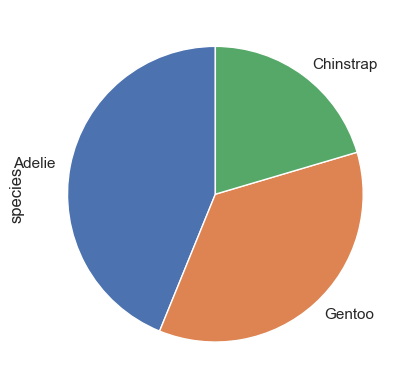

In [38]:
df["species"].value_counts().plot(kind="pie", startangle=90)

### bar plot


<AxesSubplot: >

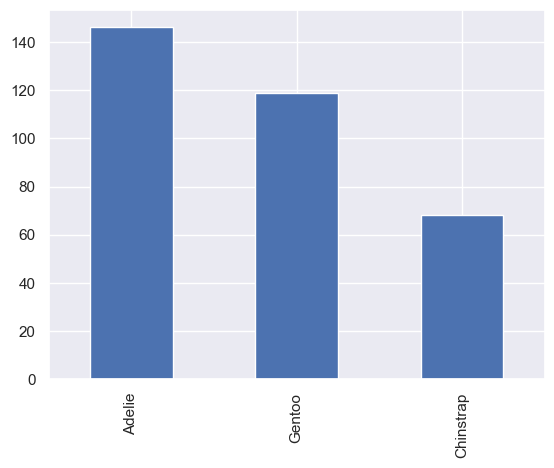

In [39]:
df["species"].value_counts().plot(kind="bar")

### band plot


/var/folders/w0/1ztjnk4s44x4rym0ys09zhvh0000gn/T/ipykernel_21159/606092702.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df, index="sex", columns="species")["bill_depth_mm"].apply(


<AxesSubplot: ylabel='sex'>

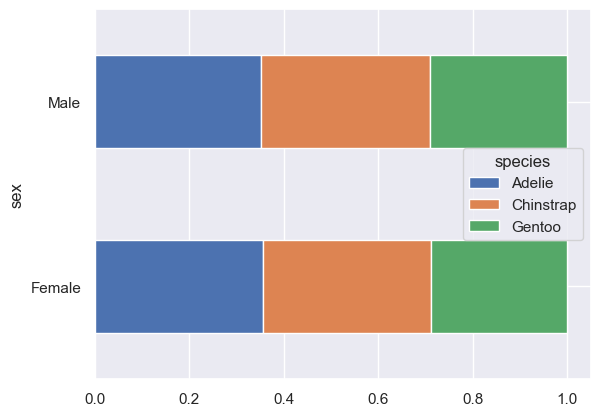

In [40]:
pd.pivot_table(df, index="sex", columns="species")["bill_depth_mm"].apply(
    lambda x: x / x.sum(), axis=1
).plot(kind="barh", stacked=True)

### mosaic plot


(<Figure size 640x480 with 3 Axes>,
 {('Male', 'Adelie'): (0.0, 0.0, 0.5019945318452781, 0.43164616840113523),
  ('Male', 'Chinstrap'): (0.0,
   0.43495742667928095,
   0.5019945318452781,
   0.20104068117313142),
  ('Male', 'Gentoo'): (0.0,
   0.6393093661305581,
   0.5019945318452781,
   0.3606906338694418),
  ('Female', 'Adelie'): (0.5069696562233876,
   0.0,
   0.49303034377661253,
   0.4394942805538832),
  ('Female', 'Chinstrap'): (0.5069696562233876,
   0.4428055388320289,
   0.49303034377661253,
   0.20469596628537018),
  ('Female', 'Gentoo'): (0.5069696562233876,
   0.6508127633955447,
   0.49303034377661253,
   0.34918723660445516)})

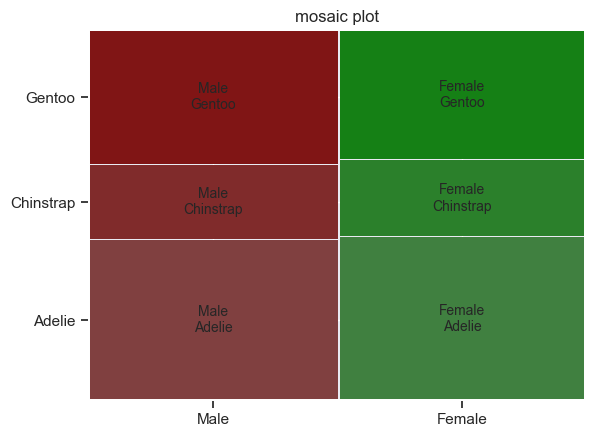

In [41]:
mosaic(df[["sex", "species", "bill_depth_mm"]], ["sex", "species"], title="mosaic plot")